In [13]:
import tensorflow as tf
from lib.utils import model ,preproc, newBuild, newGan
from keras.preprocessing.image import ImageDataGenerator

# Experiment on landscape / cityscape paintings

In [14]:
res = 128
channel = 3
# Preprocessing data with custom function
batch_size = 4
img_shape = (res,res,channel)
epochs = 500
latent_dim = 150
n_images = 16
image_dir = "../../oDig/land/"
checkpoint_dir = "../../checkpoints/land_check/"
data_loc = "../../datasets/land/"
#data_loc = "../../datasets/celeb/"
image_freq = 100
s = tf.random.normal([n_images, latent_dim]),
checkpoint_freq = 100

In [15]:
datagen = ImageDataGenerator(preprocessing_function=preproc.tanh_preprocess,
                             #vertical_flip=True,
                             horizontal_flip=True,
                             # width_shift_range=0.1,
                             # height_shift_range=0.1,
                             # shear_range=0.1,
                             # rotation_range=5,
                             # fill_mode='nearest'

                             )
train_dir = '/home/sandor/Dev/final/finalproject/gan/datasets/lands'

dataset = datagen.flow_from_directory(
     train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode=None
)
#dataset = preproc.preprocess(data_loc,res,batch_size,True)

Found 1855 images belonging to 1 classes.


In [16]:
constants = dict(
    num_conv_layers = 4,
    img_shape = img_shape,
    dim = 8,
    output = channel,
    latent_dim = latent_dim,
    kernel = 4,
    stride = 2
)
callback = dict(
    num_img = n_images,
    cFreq = checkpoint_freq,
    iFreq = image_freq,
    seed = s,
    loc = image_dir
)
gan_attributes = dict(
    check_location= checkpoint_dir,
    b_size=  batch_size,
    l_dim= latent_dim,
    data = dataset,
    epochs=epochs,
)

In [17]:
name = 'Model_1-Same-Tanh-Batch-mDrop'
parameters = dict(
    model_name=name,
    filter_mode=3,
    gen_filter=7,
    disc_filter=6,
    is_batchnorm=True,
    is_multi_drop=True,
    is_tanh=True
)
model1 = model.ModelSettings(**constants, **parameters)
gan1 = newBuild.GANBuilder(atrib=model1, name=name, **gan_attributes)
g = newBuild.make_gan(gan1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150)]             0         
                                                                 
 dense_4 (Dense)             (None, 8192)              1236992   
                                                                 
 batch_normalization_22 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                              

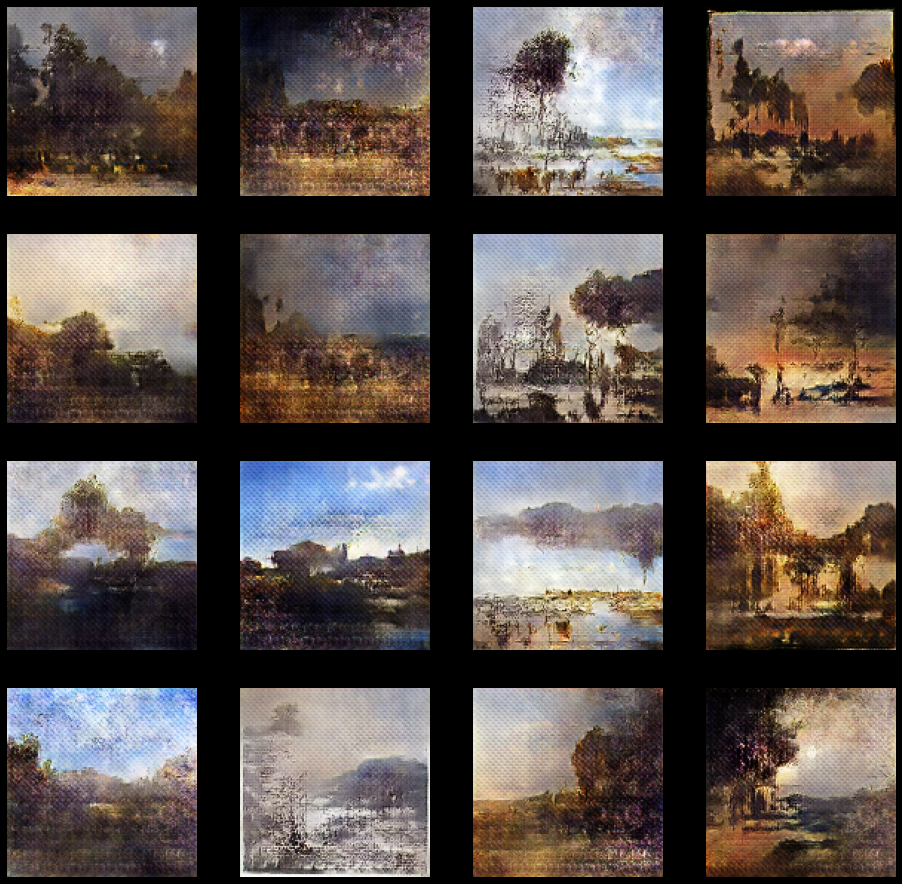

464/464 [==============================] - 27s 57ms/step - d_loss: 0.6559 - g_loss: 0.8481
Epoch 433/500
448/464 [===========================>..] - ETA: 0s - d_loss: 0.6627 - g_loss: 0.8443

KeyboardInterrupt: 

In [18]:
g.fit(dataset, epochs=epochs, callbacks = [newGan.GANCallback(name= name,**callback)])